### Sources:
* This notebook used (and modified) code from the following repos:
    * https://github.com/jonkrohn/ML-foundations
    * https://github.com/mrdbourke/pytorch-deep-learning
    * https://github.com/valerija-h/CS551G-Assignment-1.git
    * [CNN Explainer](https://poloclub.github.io/cnn-explainer/) - Detailed visualisation of what happens inside a CNN
    * [CNN Explainer paper](https://arxiv.org/abs/2004.15004)
    * [What is a convolution?](https://www.youtube.com/watch?v=KuXjwB4LzSA) from the 3Blue1Brown youtube channel
    * [Convolution arithmetic](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md) - An excellent visual illustration of convolutional operations (stride, padding,..etc)
    * https://lilianweng.github.io/
    
For any questions please contact the demonstrators:
* [Kam Woh Ng](kamwoh.ng@surrey.ac.uk)
* [Swapnil Bhosale](s.bhosale@surrey.ac.uk)
* [Haosen "Happy" Yang](h.yang@surrey.ac.uk)
* [Al-Hussein Abutaleb](a.abutaleb@surrey.ac.uk)

# Introduction to solving Computer Vision problems using PyTorch

## Computer vision libraries in PyTorch
* `torchvision` - baseline library for PyTorch computer vision
* `torchvision.datasets` - gets datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - functions for manipulating your vision data to be suitable for use with an ml model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
# Import PyTorch

import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")


# Check if GPU is available
if torch.cuda.is_available():
   print("GPU is available")
else:
   print("Change the setting in Colab, under Runtime to 'GPU'")

PyTorch version: 1.13.1+cu116
torchvision version: 0.14.1+cu116
GPU is available


## 1. Getting a dataset: [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist)

To begin working on a computer vision problem, let's get a computer vision dataset.

We're going to start with FashionMNIST. MNIST stands for Modified National Institute of Standards and Technology. The [original MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services. Amongst Deep Learning enthusiasts, solving MNIST is largely considered the equivalent to printing your first 'Hello World!' in a new programming language.

[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), made by Zalando Research, is a similar to MNIST but with a data that is slightly harder to classifiy. It contains grayscale images of 10 different kinds of clothing items, as opposed to handwritten digits in MNIST.

*[`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes, it's a multi-class classification problem. We're going to use `torchvision.datasets` buil-in functions to gain access to FashionMNIST.
This is done via [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* [`transform: torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.


## This Notebook:

You will be introduced to a variety techniques in this notebook. First, you will learn how to download the data, prepare it, and conduct basic exploratory data analysis (EPA). Following that you will be three neural networks to attempt to solve the problem of classifiying the images in the dataset. With each network a degree of complexity will be added. You will then conduct basic evaluation and comparison of all the models you created. Finally, you will learn how to save your models and re-load them for future use.

* Note: We included extra exercises for the interested investigator toward the end. Please do no hesitate to contact us should you need any help in tackling those.

May the force be with you!

In [ ]:
 # Setup the training data. Here we will use PyTorch's own build in functions to facilitate downloading the dataset

train_data = datasets.FashionMNIST(
    root="data",  # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None, # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
        root="data",
        train=False,
        download=True,
        transform=torchvision.transforms.ToTensor(),
        target_transform=None
)


In [ ]:
# Confirming the size of the train/test split. That's 60k images and labels in the training data and 10k images and labels in the testing data
len(train_data), len(test_data)

(60000, 10000)

In [ ]:

# see first the training exmaple
image,label=train_data[0]
image,label

# these are the pixels representing the first image in the data + the label (the number 9 at the bottom)
# Do you notice anything about the values of the pixels in the image?

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names
# Which one of these do you think correspond to the number 9 above? [the label that appeared after the pixels odf the image]

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
print(f"The first image has a label:{label} representing a: {class_names[label]}")

The first image has a label:9 representing a: Ankle boot


In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# These are the y_train! Or the ground truths! Each entry corresponds to an image in train_data[0]
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# check the shape
print(f"Image shape: {image.shape} -> [c,h,w]")
print(f"Image label: {class_names[label]}")

# Remember that c= channel, in this case c=1 since we are processing black and white images only

Image shape: torch.Size([1, 28, 28]) -> [c,h,w]
Image label: Ankle boot


### 1.2 Visualising our data

Image shape: torch.Size([1, 28, 28])


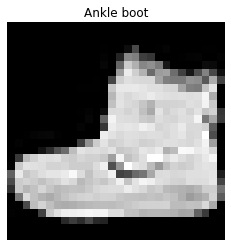

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

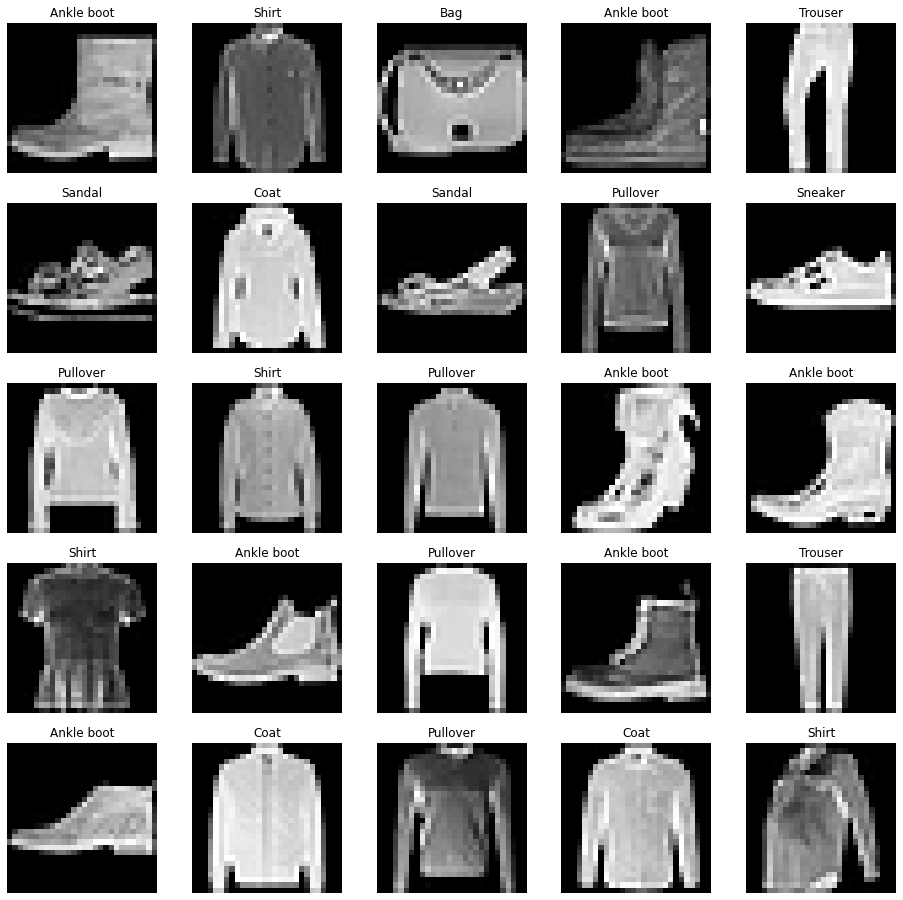

In [ ]:
# plot more images
torch.manual_seed(42)
torch.cuda.manual_seed(42)

fig = plt.figure(figsize=(16,16))
rows, cols = 5, 5
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0,len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i);
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [ ]:
# Summary of our data
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader
Right now, our data is in the form of PyTorch Datasets.
Dataloaders turn our dataset into a python iterable.
More specifically, we want to turn our data into batches (or mini-batches).
Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) 60000 images in one go.So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradient per epoch. Recall that Gradient Descent updates will happen at the end of every batch (every 32 images) rather at the end of 60k images.

In [ ]:
# turn train_data into DataLoader
from torch.utils.data import DataLoader

# set up the batch size hyperparameter. 32 is usually a good size to start from. More often than not, it will suit the pipeline you're developing
BATCH_SIZE = 32

# turn data into iterables
train_dataloader = DataLoader(dataset=train_data,
                                 batch_size=BATCH_SIZE,
                                 shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                                batch_size=BATCH_SIZE,
                                shuffle=False) # test data is only used for evaluation, shuffling it makes no difference and makes the process of comparing different models easier

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f669e5b15b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f669e5b1550>)

In [ ]:
# Let's check out what what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

# You can double check the above by dividing 60k by 32

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f669e5b15b0>, <torch.utils.data.dataloader.DataLoader object at 0x7f669e5b1550>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape
# you can read the output as a batch of 32 images, each with size [1,28,28], with corresponding 32 labels

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


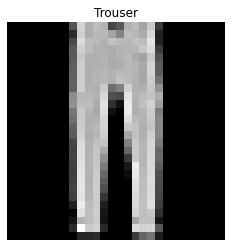

In [ ]:
# show a sample
torch.manual_seed(42)
# generate a random index
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
# pick out a random image and its label
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model
When starting to build a series of machine learning modelling experiements, it's best practice to start with a baseline model.
A baseline model is a simple model you will try and improve upon with subsequent models/expirements.
In other words, start simply and add complextiy when necessary.


[`torch.nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) - Please read the documentation. Can you guess what this layer is doing to the input data (image)?

In [ ]:
# create a flatten later
flatten_model = nn.Flatten()

# Get a single sample (the first sample image)
x = train_features_batch[0]

output = flatten_model(x)  # will perform a forward pass on the flatten layer

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


## Please a have a look at PyTorch [documentation](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html) before running the cell below.

In [ ]:
from torch import nn

# We now create a our first neural network. This will be a basic feed forward linear network

class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        # Here we build the architecure of the model
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):  # x is the batch of images
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
# We create one instance of the model and set up the model with desired input parameters. These will be the size of the images the model will receive
# the number of hidden units inside the model (higher is more computationally expensive and complex) and the output shape (usually the number of classes in the data)
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names) # one for every class
).to("cpu") # Let's stay on the cpu for now


model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
# random data tensor
dummy_x = torch.rand([1, 1, 28, 28])
# forward pass with the random data
model_0(dummy_x)



tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics
* Loss function - since we're working with multi-class data, our loss function will be [`nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
* Optimizer - our optimizer [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric. You can either use torchmetrics or use the function provided below (accuracy_fn())

In [ ]:
# You can use torchmetrics library's Accuracy class to measure the accuracy of your model (the code below is meant to ensure we have the correct version of torchmetrics)
# Or you can use the function accuracy_fn declared below, which we will use for the remainder of this notebook

try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
# Note that the task is set to 'multiclass' since we're dealing with 10 labels
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to("cpu") # since model_0 is on cpu

# Calculate accuracy
# torchmetrics_accuracy(y_preds, y_blob_test)

In [ ]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


### 3.2 Create a function to time our expirement
ML is very experimental.
Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy, etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
# start_time = timer()
# # some code...
# end_time = timer()
# print_train_time(start=start_time, end=end_time, device="cpu")

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the test loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per bacth.
4. Print out metrics vs epochs.
5. Time it all

**Note:** Because we are computing on *batches*, the optimizer will update the model's parameters once *per batch* rather than once per epoch.


#### Generally speaking, training any model in PyTorch is done trhough 5 steps:
1. Forward pass -> give the model first batch of data and save it.
2. Calculate the loss from this data -> how far is it from the ground truth
3. [Zero the gradient](https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch#:~:text=zero_grad()%20restarts%20looping%20without,increase%20not%20decrease%20as%20required.) This is done to make sure losses from the last step to add on to the current step.
4. Backpropagate through the model to update the weights
5. Step the gradient and redo the process!

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    train_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
        # Put model_0 in training mode, allow weight updates!
        # 1. Training mode -> on + forward pass
        model_0.train()
        # forward pass
        y_pred = model_0(X)
        # 2. Calculate the loss!
        loss = loss_fn(y_pred, y)
        train_loss += loss
        # 3. Zero the grad! Otherwise losses will add up with every epoch
        optimizer.zero_grad()
        # 4. Backpropagate through the network
        loss.backward()
        # 5. Step forward in the loss landscape!
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    train_loss /= len(train_dataloader)   # trainloss/number of batches

    test_loss= 0
    test_acc = 0
    # we put model_0 in evaluation mode so that its weights are frozen. We don't want to give it testing data (to measure performance) and have the weight changed!
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            test_pred = model_0(X_test) # this output is in logits (why we need the argmax later to convert the logits to the label format so they can be compared with y_test)
            test_loss += loss_fn(test_pred,y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")


# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 24.903 seconds


## 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)

# we'll build one eval functiont that we can use with a different set of models so we can make the comaprion easier
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader"""
    loss, acc =0,0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
           "model_loss": loss.item(),
            "model_accuracy": acc
           }
# Calculate model 0 results on test dataset
model_0_results = eval_model(
                    model=model_0,
                    data_loader=test_dataloader,
                    loss_fn=loss_fn,
                    accuracy_fn=accuracy_fn
)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

In [ ]:
# device

## 5. Setup device agnostic-code

In [ ]:
# What GPU do you have!?
!nvidia-smi

Wed Feb 22 12:51:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Will give true if gpu is available
torch.cuda.is_available()

True

In [ ]:
# set up device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

We will add two [`nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) layers to model_0 to create model_1.


In [ ]:

class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                input_features: int,
                hidden_units: int,
                output_features: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features = 10),
        nn.ReLU(),
        )
    def forward(self,x: torch.Tensor):# -> torch.Tensor:
        return self.layer_stack(x)



In [ ]:
# Create an instance of model_1


torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_features=784, # this is the output of the flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_features=len(class_names)).to(device) # send to the GPU if it's available
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)



### 6.2 Functionizing training and evaluation/testing loops
Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

This will make it easier to train and test the models we're working on.

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
    """Performs a training step with model trying to learn on data_loader"""

    train_loss,train_acc =0,0
    # put the model into training mode
    model.train()

    for batch, (X,y) in enumerate(data_loader):
        # put data on target device
        X,y = X.to(device), y.to(device)
        # 1. Forward pass (outputs the raw logits from the model)
        model.train()
        y_pred = model(X)
        #2. calculate accuracy and loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumelate training loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))#from logits to prediction labels
        # 3 Zero the losses
        optimizer.zero_grad()
        # 4 backprop through the model and update the weights
        loss.backward()
        # 5. step the optimizer
        optimizer.step()

    train_loss /= len(data_loader)   # trainloss/number of batches
    train_acc /= len(data_loader)
    print(f"\nTrain loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")


In [ ]:
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device=device):
    """Performs a testing loop step on moel going over data_loader"""

    test_loss= 0
    test_acc = 0
    #put model in eval mode
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)
            #1. forward pass
            test_pred = model(X) # this output is in logits (why we need the argmax later to convert the logits to the label format so they can be compared with y_test)
            #2. calc loss/acc
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        print(f"\nTest loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%\n")



In [ ]:
# We will no wuse the training/testing functions above to train and test model_1

torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()


epoch = 3

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------------")

    train_step(model=model_1,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)




train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


Train time on cuda: 0.000 seconds


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------

Train loss: 1.0920 | Train acc: 61.34%

Test loss: 0.9564 | Test acc: 65.00%

Epoch: 1
--------------

Train loss: 0.7810 | Train acc: 71.93%

Test loss: 0.7223 | Test acc: 73.91%

Epoch: 2
--------------

Train loss: 0.6703 | Train acc: 75.94%

Test loss: 0.6850 | Test acc: 75.02%

Train time on cuda: 29.218 seconds


In [ ]:
# Train time on CPU
total_train_time_model_0

24.902695028999915

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

> **Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms compute capability than the GPU.
>
> For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [ ]:
torch.manual_seed(42)
# we'll build one eval functiont that we can use with a different set of models so we can make the comaprion easier

def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn, device=device):
    """Returns a dictionary containing the results of model predicting on data_loader"""
    loss, acc =0,0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X,y=X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
           "model_loss": loss.item(),
            "model_accuracy": acc
           }


Lot's compare model_0 and model_1 results.

In [ ]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_accuracy': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create a convolution neural network

class FashionMNISTModelV2(nn.Module):
# """  Model architecture that replicates the TinyVGG  model from CNN explainer website: https://poloclub.github.io/cnn-explainer/.  """
    def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
        super().__init__()
        # Will create to convolutional blocks, each containing two convolutional layers + two ReLU activations + and one MaxPool layer
        self.conv_block_1 = nn.Sequential(
            # Create a conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            # how to use a ReLU(): https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        # Final classifier layer
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # Can you predict the shape of the Flatten() layer output?
                                              # Remember the output of conv2 block 2 is passed through the flatten first
                      # Note: formula for calculating shapes can be found on: https://pytorch.org/docs/master/generated/torch.nn.Conv2d.html
                     out_features=output_shape)
        )

    def forward(self,x):
        x = self.conv_block_1(x)
#         print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
#         print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
#         print(f"Output shape of classifier: {x.shape}")
        return x

In [ ]:
torch.manual_seed(42)
# input shape will be the number of channels
# output shape will be the number of classes
model_2 = FashionMNISTModelV2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)



### 7.1 Stepping through `Conv2d`

See the documentation for `nn.Conv2d()` here - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
torch.manual_seed(42)

# create a batch of 32 colour images of size 64 x 64 (these are just a collection of random numbers)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

# Remember again that one of the most common sources of errors in DL models is a shape mismatch
# Let's make sure we got the right shapes
print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
# print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])


In [ ]:
torch.manual_seed(42)
# Create a sinlge conv2d layer
conv_layer = nn.Conv2d(in_channels=3, # in_channel=3 since the random images above are coloured
                       out_channels=10,
                       kernel_size=(3, 3), # size 3 == size (3,3)
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

# Can you explain the size of the output?

# change the hyper parameters of conv_layer and see how this affect the shape of the final output!

torch.Size([10, 62, 62])

### 7.2 Stepping through [`nn.MaxPool2d`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)

The sources at the top include useful explanations on the MaxPooling operation.

In [ ]:
# # Print out original image shape without unsqueezed dimension
# print(f"Test image original shape: {test_image.shape}")
# print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# # Create a sample nn.MaxPool2d layer
# max_pool_layer = nn.MaxPool2d(kernel_size=2)

# # Pass data through just the conv_layer
# test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
# print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# # Pass data through the max pool layer
# test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
# print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

In [ ]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
# print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")


print(f"\n\n Can you explain the change in the shape?")

print(f"\n\n How does changing the hyperparameters change the output?")

Test image original shape: torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])


 Can you explain the change in the shape?


 How does changing the hyperparameters change the output?


In [ ]:
torch.manual_seed(42)
# Create a random tesnor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
# print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
# print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor shape: torch.Size([1, 1, 2, 2])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
image.shape

torch.Size([1, 28, 28])

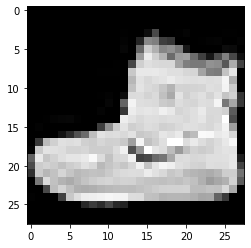

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")


In [ ]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 7.3 Setup loss function/eval metrics/optimizer

In [ ]:
# Setup loss function/eval metrics/optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)

In [ ]:
# what we're trying to optimizer is... (weights of the kernels + biases)
# model_2.state_dict()

## 7.4 Training and testing model_2 using our training and testing functions

In [ ]:
# Now, using the functions for training/testing you created earlier but this time with model_2
# make sure you comment the print statements inside the forward pass!!

torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epoch = 3
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_2,
              data_loader= train_dataloader,
              loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                           end = train_time_end_model_2,
                                            device = device)


Epoch: 0
-------

Train loss: 0.5990 | Train acc: 78.25%

Test loss: 0.3987 | Test acc: 85.77%

Epoch: 1
-------

Train loss: 0.3612 | Train acc: 86.96%

Test loss: 0.3473 | Test acc: 87.05%

Epoch: 2
-------

Train loss: 0.3236 | Train acc: 88.28%

Test loss: 0.3236 | Test acc: 88.36%

Train time on cuda: 43.667 seconds


In [ ]:
# get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3235771954059601,
 'model_accuracy': 88.35862619808307}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

## 8. Compare all results from the three different models you developed!

* Remember that the first one was a feedforard network with no nonlinearity (no activation function)
* The second model (model_1) was exactly the same as the first one but with added nonlinearity (Relu activation function).
* The third model was a Convolutional Neural Network

In [ ]:
# A good way is to combine the results into one data structure. A pandas DataFrame is a very convenient way to do that:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])

compare_results.sort_values("model_accuracy") # ranks based on accuracy

,model_name,model_loss,model_accuracy
1,FashionMNISTModelV1,0.685001,75.019968
0,FashionMNISTModelV0,0.476639,83.426518
2,FashionMNISTModelV2,0.323577,88.358626


# Questions to ponder:
* Why do you think model_1 was the worst performing? What can you do to make it better? Which hyperparameters would you modify?
* Conversly, why do you think model_2 was the best performing? Is there way to make it even better?
* Expirement with increasing the epochs (ie training time), how does that affect model performanec overall?


In [ ]:
# We'll now add one more column to include training time to the results
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_accuracy,training_time
0,FashionMNISTModelV0,0.476639,83.426518,24.902695
1,FashionMNISTModelV1,0.685001,75.019968,29.218039
2,FashionMNISTModelV2,0.323577,88.358626,43.667201


* Now that you have factored in training time, what do you notice?
* Are the few seconds extra spent on training model_2 worth the added extra few percentages in accuracy? When training very large models such minute differences can mean significant costs incurred or saved.

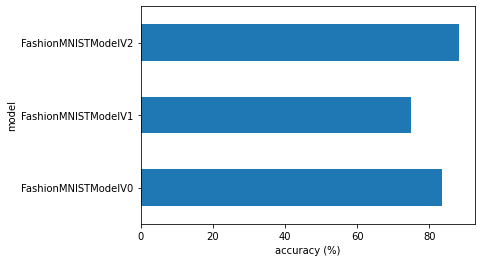

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_accuracy"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [ ]:
# We want to give the model (any model of type nn.Module) some data, and then have the model
# return predictions for the data we gave it. In other words, we'll give the model
# some photos and ask it to tell us what they are (jacket, dress, shoes...etc). You can expirement of doing this with models you developed BEFORE and AFTER training
# and observe the change in performance.
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=16):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


Text(0.5, 1.0, 'Sandal')

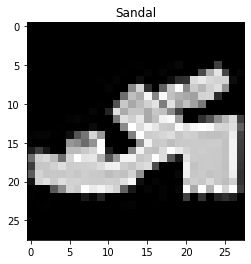

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
# Could you make sense of these probabilities? Remember, each index is a probability of a label!
pred_probs[:2]

tensor([[8.4548e-08, 2.6492e-08, 1.6960e-08, 1.3328e-07, 1.3750e-08, 9.9986e-01,
         4.6409e-07, 6.9637e-06, 8.0174e-05, 4.9428e-05],
        [2.9500e-02, 4.4739e-01, 1.0426e-03, 1.8423e-01, 9.1149e-02, 1.0396e-04,
         2.4095e-01, 1.4864e-03, 1.5640e-04, 3.9954e-03]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2, 0, 1, 0, 3])

In [ ]:
# Are the pred_classes in the same format as the test labels?
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2, 0, 1, 0, 4]

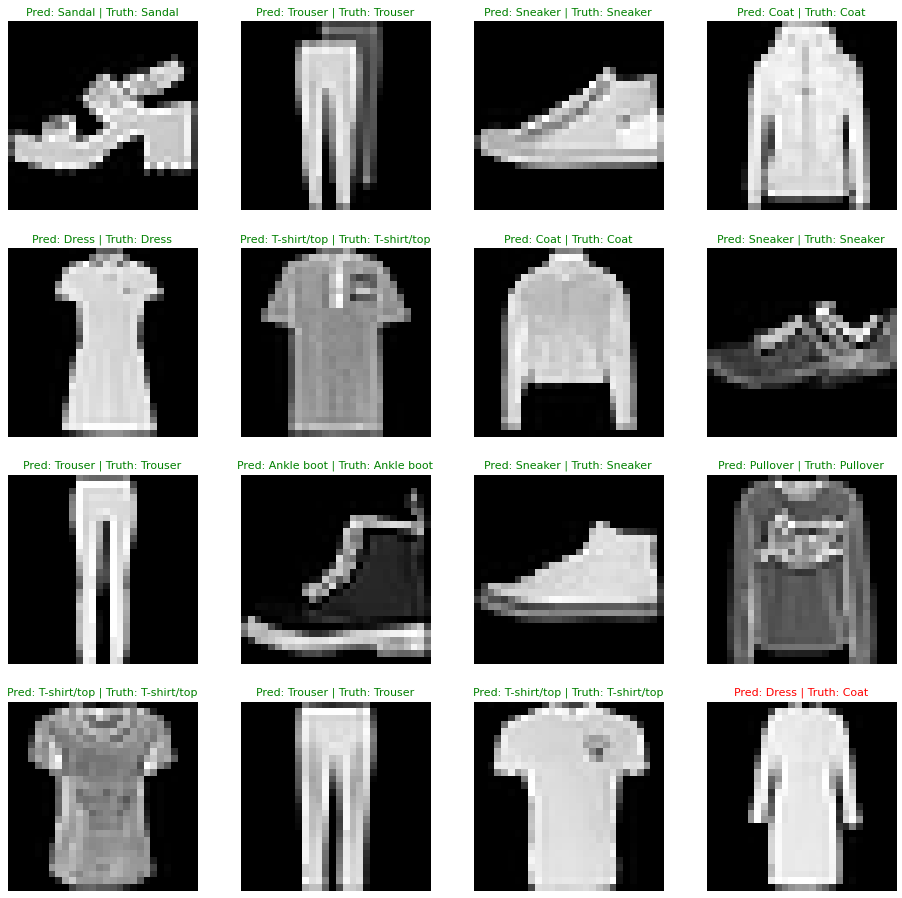

In [ ]:
# Plot predictions
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

nrows = 4
ncols = 4
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=11, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=11, c="r")

  plt.axis(False);

* if you see any mistakes in the model's predictions, could inuit as to why this was difficult for the model for that particular image?~

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually: https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html)
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/)

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."): #check the docs for tqdm
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
#     print(y_logit.shape) # result: torch.Size([32, 10])
    # Turn predictions from logits -> prediction probabilities -> prediction labels
#     print(y_logit.squeeze().shape) # result: torch.Size([32, 10])
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())
#     break
# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor






Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
# len(y_pred) # this will yield 16 not the expected batch size of 32, Can you guess why?
y_pred.shape

torch.Size([16])

In [ ]:
# See if torchmetrics exists, if not, install the correct version
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.21.0


Now we've got predictions, let's go through steps 2 & 3:
2. Make a confusion matrix using [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

First we'll need to make sure we've got `torchmetrics` and `mlxtend` installed (these two libraries will help us make and visual a confusion matrix).

> **Note:** If you're using Google Colab, the default version of `mlxtend` installed is 0.14.0 (as of March 2022), however, for the parameters of the `plot_confusion_matrix()` function we'd like use, we need 0.19.0 or higher.

In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

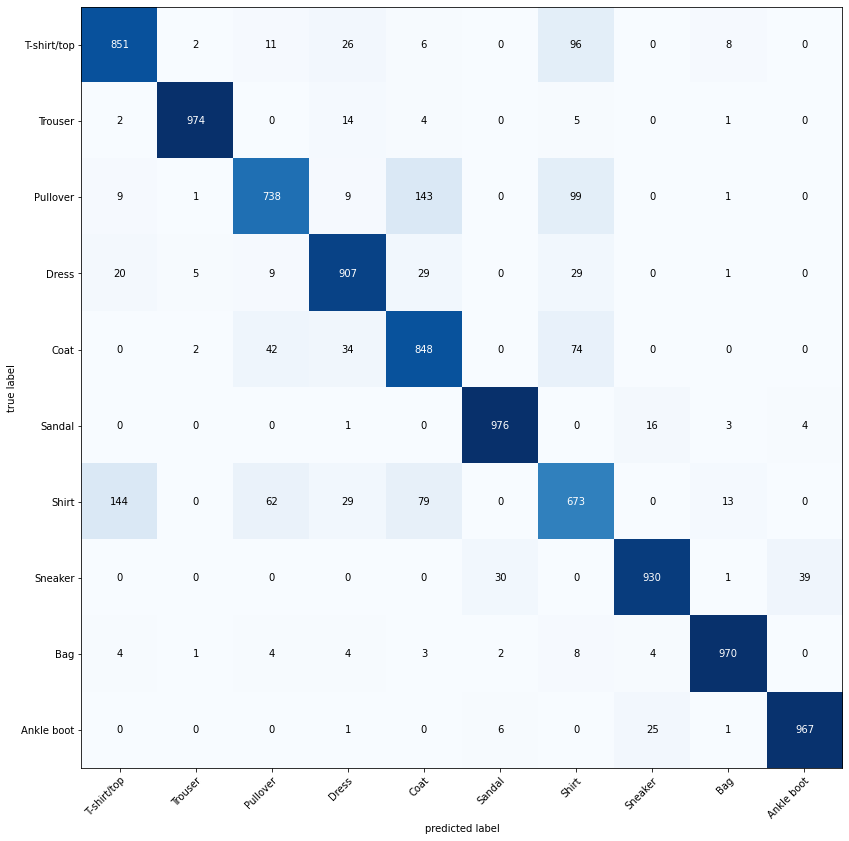

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(14, 14)
);

### A few questions:
1. Where do you think the model gets most 'confused'? What objects to tend fool the model into mislabelling them?
2. What are the implications of this? Can you think in terms of recall vs precision

> **Exercise:** Use the trained `model_2` to make predictions on the test FashionMNIST dataset. Then plot some predictions where the model was wrong alongside what the label of the image should've been. After visualing these predictions do you think it's more of a modelling error or a data error? As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

## 11. Save and load best performing model

Let's finish this section off by saving and loading in our best performing model.

We can save and load a PyTorch model using a combination of:
* `torch.save` - a function to save a whole PyTorch model or a model's `state_dict()`.
* `torch.load` - a function to load in a saved PyTorch object.
* `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance.

You can see more of these three in the [PyTorch saving and loading models documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

For now, let's save our `model_2`'s `state_dict()` then load it back in and evaluate it to make sure the save and load went correctly.

In [ ]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


Now we've got a saved model `state_dict()` we can load it back in using a combination of `load_state_dict()` and `torch.load()`.

Since we're using `load_state_dict()`, we'll need to create a new instance of `FashionMNISTModelV2()` with the same input parameters as our saved model `state_dict()`.

In [ ]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will produce an error if the shapes here aren't the same as the saved version This is a notable difference between PyTorch and Tensorflow. PyTorch usually needs both the weights/params of model + the architecture
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

And now we've got a loaded model we can evaluate it with `eval_model()` to make sure its parameters work similarly to `model_2` prior to saving.

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3235771954059601,
 'model_accuracy': 88.35862619808307}

Do these results look the same as `model_2_results`?


In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3235771954059601,
 'model_accuracy': 88.35862619808307}

We can find out if two tensors are close to each other using `torch.isclose()` and passing in a tolerance level of closeness via the parameters `atol` (absolute tolerance) and `rtol` (relative tolerance).

If our model's results are close, the output of `torch.isclose()` should be true.

In [ ]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

## Exercises

All of the exercises are focused on practicing the code in the sections above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).


1. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).
    * Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.
2. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.
3. Visualize at least 5 different samples of the MNIST training dataset.
4. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.
5. Recreate `model_2` used in this notebook (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.
6. Train the model you built in the previous step. on CPU and GPU and see how long it takes on each.
7. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.
8. Plot a confusion matrix comparing your model's predictions to the truth labels.
9. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?
10. Use a model similar to the trained `model_2` from this notebook to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
    * Then plot some predictions where the model was wrong alongside what the label of the image should've been.
    * After visualing these predictions do you think it's more of a modelling error or a data error?
    * As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

## Extra-curriculum
* **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=7sB052Pz0sQ&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) lectures. This will give you a great intuition behind convolutional neural networks.
* Spend 10-minutes clicking thorugh the different options of the [PyTorch vision library](https://pytorch.org/vision/stable/index.html), what different modules are available?
* Lookup "most common convolutional neural networks", what architectures do you find? Are any of them contained within the [`torchvision.models`](https://pytorch.org/vision/stable/models.html) library? What do you think you could do with these?
* For a large number of pretrained PyTorch computer vision models as well as many different extensions to PyTorch's computer vision functionalities check out the [PyTorch Image Models library `timm`](https://github.com/rwightman/pytorch-image-models/) (Torch Image Models) by Ross Wightman.

* Using what you learned in this notebook, could you build a pipeline to to solve [CIFAR10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10)? How would you change model_2 to accomodate the extra complexity of CIFAR10? At what point do you reaching diminishing returns in terms of model complexity vs training time vs over-fitting ?

* Generative Deep Learning is a thriving and very active area of research. Recent models such as DALL-E, Midjounrney, Stable Diffusion, and Imagen recently made headlines around the world. The most recent models use a recently developed approach called [Diffiusion](https://jalammar.github.io/illustrated-stable-diffusion/). However, it could be argued that the real interest in generative AI began in 2014 with Ian Goodfellow's landmark [paper](https://dl.acm.org/doi/abs/10.1145/3422622) which introduced Generative adversarial networks (GAN). This is a good broad introduction to the [topic](https://www.youtube.com/watch?v=QcLlc9lj2hk&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=4).
    * What do you think the ethical and societal implications of Generative AI technology? How do you think such advances should be (if any) regulated?
    * Can you come up with a few examples of using GANs to solve real world problems?

* If you broadly understand the concept behind GANs, you may want to expirement with this (repo)[https://github.com/valerija-h/CS551G-Assignment-1.git]. It uses a [Conditional GANs](https://arxiv.org/abs/1411.1784) approach to solve a data generation problem:
    * Clone the repo including the x-ray data
    * Read the associated pdf document that explains the problem
    * Run the code on your machine/Colab, you should be able to generate x-ray images!
    * Experiment with modifying the hyperparameters, what do you notice? Try decreasing or increasing the size of the latent space, what do you notice?
    * Are there ways where you can modify the code to achieve faster training time? Why is GAN training notoriously unstable? Read more about here [GANs](https://lilianweng.github.io/posts/2017-08-20-gan/). Which parameters do you think the owener of the repo used to achieve stable training? Remember that in GANs we aim for a loss of 0.5, not zero!
    * For an interesting example of GANs in action, check: https://this-person-does-not-exist.com/en

